In [647]:
import requests
url = 'https://apitempo.inmet.gov.br/estacao/2022-05-01/2022-07-08/A201'
resultado = requests.get(url)

In [648]:
import json
dados_org = resultado.json()
dados_str = json.dumps(dados_org)


In [649]:
import pandas as pd
import numpy as np
import yfinance as yf

In [650]:
dados_tabla = pd.read_json(dados_str)
dados_tabla

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,BELÉM,1010.1,27.2,-1.411228,1010.2,PA,1.3,23.4,23.6,-48.439512,...,0.0,23.0,24.0,13.0,3.3,26.0,23.9,97.0,A201,0
1,BELÉM,1010.4,27.3,-1.411228,1010.5,PA,0.5,23.6,23.9,-48.439512,...,0.0,23.4,24.1,13.0,1.6,26.0,24.0,97.0,A201,100
2,BELÉM,1010.3,27.6,-1.411228,1010.4,PA,-1.3,23.7,24.0,-48.439512,...,0.0,23.6,24.3,13.0,1.9,26.0,24.2,97.0,A201,200
3,BELÉM,1010.1,27.5,-1.411228,1010.4,PA,-1.7,23.6,24.0,-48.439512,...,0.0,23.6,24.2,13.0,1.4,26.0,24.1,97.0,A201,300
4,BELÉM,1009.4,27.6,-1.411228,1010.1,PA,0.0,23.8,23.9,-48.439512,...,0.0,23.6,24.1,13.0,1.5,25.0,24.1,98.0,A201,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,BELÉM,1010.1,30.0,-1.411228,1010.1,PA,1051.2,23.2,29.3,-48.439512,...,2.5,22.9,31.4,14.5,7.1,34.0,29.4,69.0,A201,1900
1652,BELÉM,1010.1,29.4,-1.411228,1010.2,PA,535.5,22.8,27.7,-48.439512,...,1.4,22.5,30.3,13.4,6.8,32.0,27.7,75.0,A201,2000
1653,BELÉM,NaN,NaN,-1.411228,NaN,PA,NaN,NaN,NaN,-48.439512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A201,2100
1654,BELÉM,NaN,NaN,-1.411228,NaN,PA,NaN,NaN,NaN,-48.439512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A201,2200


In [651]:
dados = dados_tabla[['DT_MEDICAO', 'HR_MEDICAO', 'TEM_INS', 'UMD_INS', 'RAD_GLO']]
dados

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
0,2022-05-01,0,23.9,97.0,1.3
1,2022-05-01,100,24.0,97.0,0.5
2,2022-05-01,200,24.2,97.0,-1.3
3,2022-05-01,300,24.1,97.0,-1.7
4,2022-05-01,400,24.1,98.0,0.0
...,...,...,...,...,...
1651,2022-07-08,1900,29.4,69.0,1051.2
1652,2022-07-08,2000,27.7,75.0,535.5
1653,2022-07-08,2100,NaN,NaN,NaN
1654,2022-07-08,2200,NaN,NaN,NaN


# Renomia o titulo do nosso dados

In [652]:
dados.columns = ['DATA','HORARIO', 'TEMPERATURA', 'UMIDADE', 'RADIACAO']

In [653]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2022-05-01,0,23.9,97.0,1.3
1,2022-05-01,100,24.0,97.0,0.5
2,2022-05-01,200,24.2,97.0,-1.3
3,2022-05-01,300,24.1,97.0,-1.7
4,2022-05-01,400,24.1,98.0,0.0
...,...,...,...,...,...
1651,2022-07-08,1900,29.4,69.0,1051.2
1652,2022-07-08,2000,27.7,75.0,535.5
1653,2022-07-08,2100,NaN,NaN,NaN
1654,2022-07-08,2200,NaN,NaN,NaN


<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='HORARIO'>

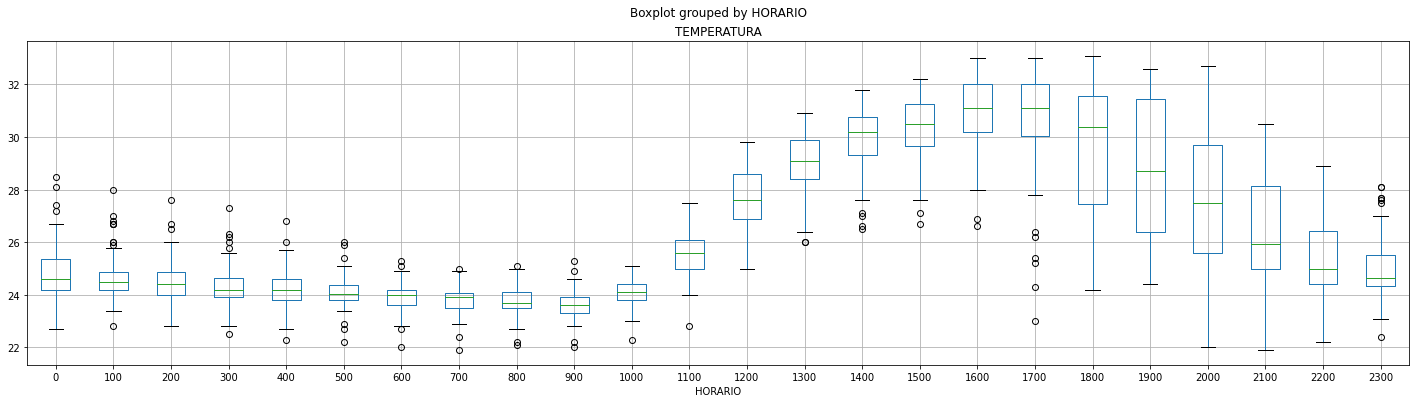

In [654]:
dados.boxplot("TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'UMIDADE'}, xlabel='HORARIO'>

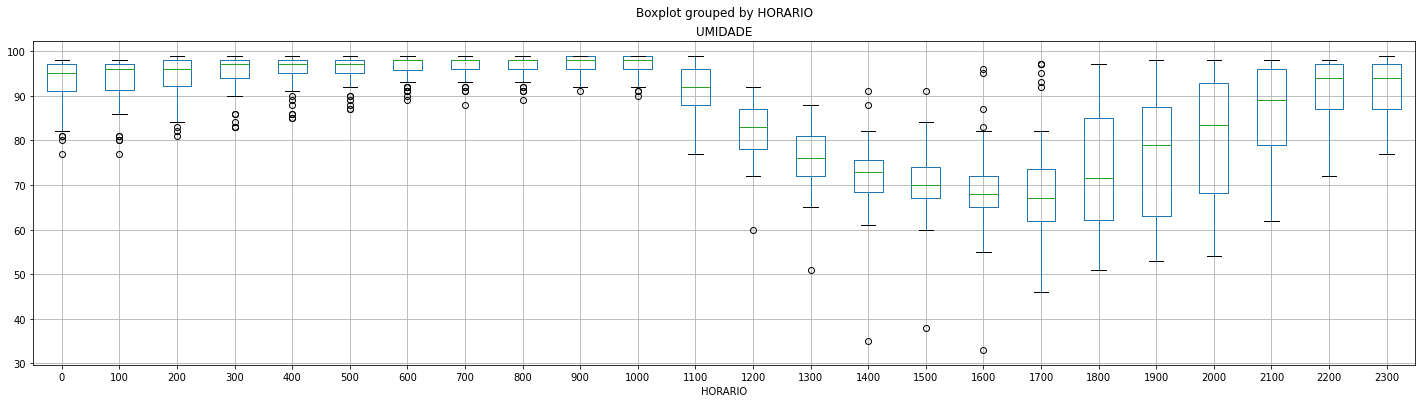

In [655]:
dados.boxplot("UMIDADE", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'RADIACAO'}, xlabel='HORARIO'>

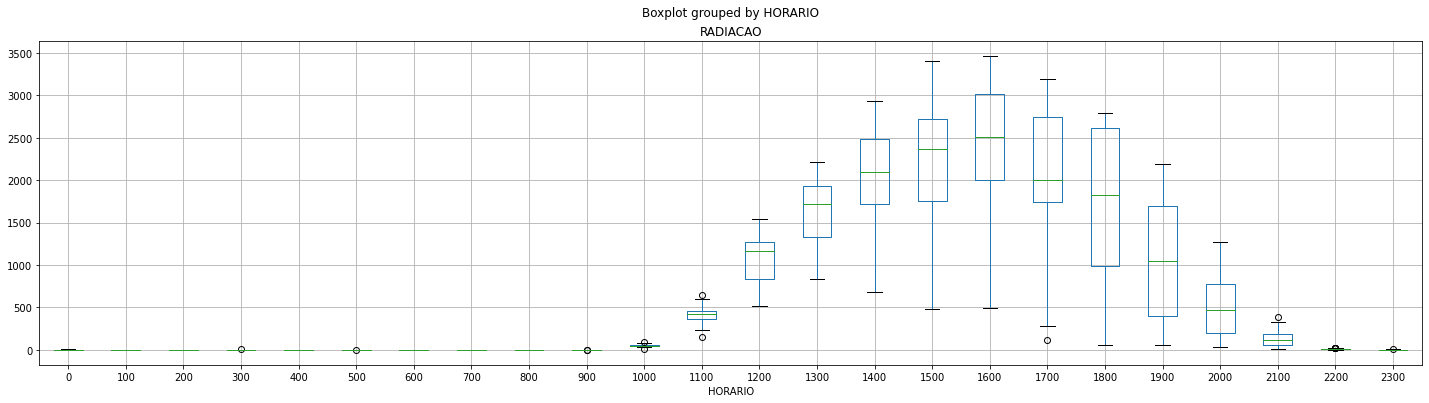

In [656]:
dados.boxplot("RADIACAO", by='HORARIO', figsize=(24,6))

# Verificando a suma de dados null 

In [657]:
#previsoes_dados.boxplot("PREVISOES_TEMPERATURA", by='HORARIO', figsize=(24,6))dados.apply(pd.isnull).sum()/dados.shape[0]

In [658]:
dados[pd.isnull(dados['TEMPERATURA'])]

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
964,2022-06-10,400,NaN,NaN,NaN
965,2022-06-10,500,NaN,NaN,NaN
966,2022-06-10,600,NaN,NaN,NaN
967,2022-06-10,700,NaN,NaN,NaN
968,2022-06-10,800,NaN,NaN,NaN
...,...,...,...,...,...
1355,2022-06-26,1100,NaN,NaN,NaN
1473,2022-07-01,900,NaN,NaN,NaN
1653,2022-07-08,2100,NaN,NaN,NaN
1654,2022-07-08,2200,NaN,NaN,NaN


In [659]:
dados = dados.fillna(method='ffill')

In [660]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.0
HORARIO        0.0
TEMPERATURA    0.0
UMIDADE        0.0
RADIACAO       0.0
dtype: float64

# verificando se nosso dados são numéricos

In [661]:
dados.dtypes

DATA            object
HORARIO          int64
TEMPERATURA    float64
UMIDADE        float64
RADIACAO       float64
dtype: object

<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='DATA'>

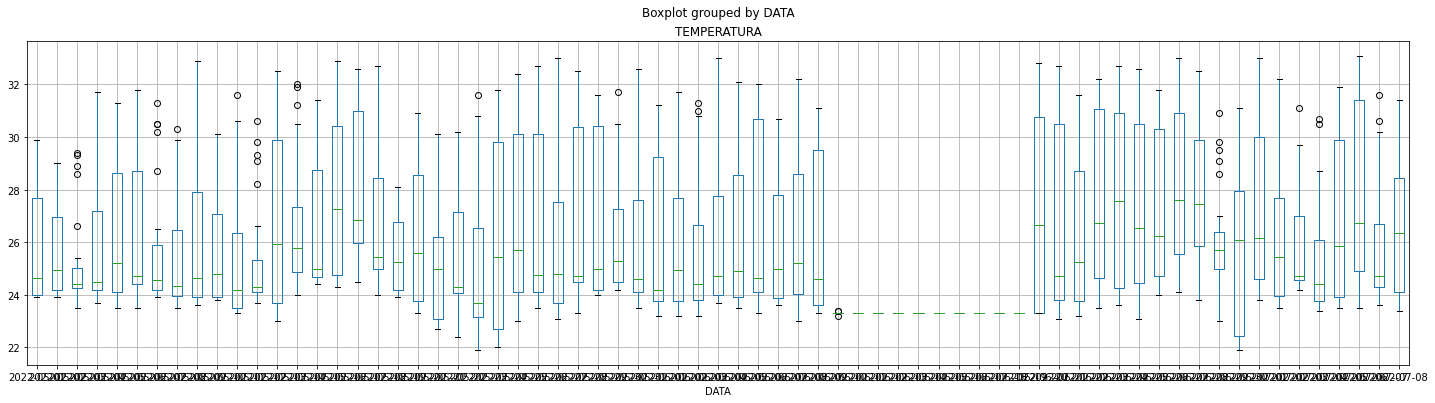

In [662]:
dados.boxplot("TEMPERATURA", by='DATA', figsize=(24,6))

<AxesSubplot:>

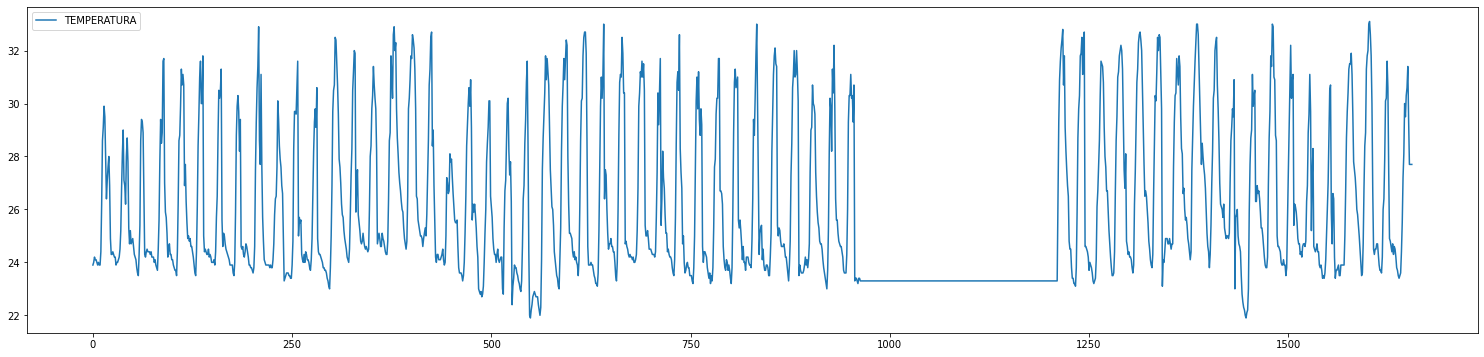

In [663]:
dados[['TEMPERATURA']].plot(figsize=(26,6))

# Agrupando os dados por horário

In [664]:
dados.groupby(dados.HORARIO).sum()

,TEMPERATURA,UMIDADE,RADIACAO
HORARIO,,,
0,1701.7,6442.0,-47.6
100,1691.7,6480.0,-64.4
200,1681.2,6527.0,-94.7
300,1673.2,6555.0,-97.4
400,1663.9,6583.0,-104.0
500,1653.8,6609.0,-122.9
600,1647.5,6639.0,-129.5
700,1639.5,6658.0,-132.7
800,1633.1,6667.0,-135.0


### Criando novos colunas para Temperatura da amahão, Umidade da amahão e Radiação da amahão na tabla  

In [665]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2022-05-01,0,23.9,97.0,1.3
1,2022-05-01,100,24.0,97.0,0.5
2,2022-05-01,200,24.2,97.0,-1.3
3,2022-05-01,300,24.1,97.0,-1.7
4,2022-05-01,400,24.1,98.0,0.0
...,...,...,...,...,...
1651,2022-07-08,1900,29.4,69.0,1051.2
1652,2022-07-08,2000,27.7,75.0,535.5
1653,2022-07-08,2100,27.7,75.0,535.5
1654,2022-07-08,2200,27.7,75.0,535.5


### Criando novos colunas para Temperatura da amahão, Umidade da amahão e Radiação da amahão na tabla 

In [666]:
dados['TEMP_AMANHAO'] = dados.shift(-1)['TEMPERATURA']
dados['TEMP_MES_MIX'] = dados['TEMPERATURA'].rolling(30).mean()

In [667]:
dados['UMID_AMANHAO'] = dados.shift(-1)['UMIDADE']
dados['UMID_MES_MIX'] = dados['UMIDADE'].rolling(30).mean()

In [668]:
dados['RADI_AMANHAO'] = dados.shift(-1)['RADIACAO']
dados['RADI_MES_MIX'] = dados['RADIACAO'].rolling(30).mean()

In [669]:
dados['HORARIO_ATUAL'] = dados.shift(3)['HORARIO']

In [670]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMANHAO,TEMP_MES_MIX,UMID_AMANHAO,UMID_MES_MIX,RADI_AMANHAO,RADI_MES_MIX,HORARIO_ATUAL
0,2022-05-01,0,23.9,97.0,1.3,24.0,NaN,97.0,NaN,0.5,NaN,NaN
1,2022-05-01,100,24.0,97.0,0.5,24.2,NaN,97.0,NaN,-1.3,NaN,NaN
2,2022-05-01,200,24.2,97.0,-1.3,24.1,NaN,97.0,NaN,-1.7,NaN,NaN
3,2022-05-01,300,24.1,97.0,-1.7,24.1,NaN,98.0,NaN,0.0,NaN,0.0
4,2022-05-01,400,24.1,98.0,0.0,24.0,NaN,98.0,NaN,-0.8,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2022-07-08,1900,29.4,69.0,1051.2,27.7,26.630000,75.0,84.033333,535.5,878.973333,1600.0
1652,2022-07-08,2000,27.7,75.0,535.5,27.7,26.550000,75.0,84.166667,535.5,835.466667,1700.0
1653,2022-07-08,2100,27.7,75.0,535.5,27.7,26.466667,75.0,84.233333,535.5,773.836667,1800.0
1654,2022-07-08,2200,27.7,75.0,535.5,27.7,26.336667,75.0,84.500000,535.5,691.346667,1900.0


### Deletando NULL

In [671]:
dados = dados.iloc[30:,:].copy()
dados = dados.iloc[:-1, :].copy()

In [672]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMANHAO,TEMP_MES_MIX,UMID_AMANHAO,UMID_MES_MIX,RADI_AMANHAO,RADI_MES_MIX,HORARIO_ATUAL
30,2022-05-02,600,24.0,98.0,-1.2,24.0,25.543333,98.0,92.066667,-0.8,369.443333,300.0
31,2022-05-02,700,24.0,98.0,-0.8,24.1,25.543333,98.0,92.100000,-0.5,369.400000,400.0
32,2022-05-02,800,24.1,98.0,-0.5,24.2,25.540000,98.0,92.133333,-0.2,369.426667,500.0
33,2022-05-02,900,24.2,98.0,-0.2,24.5,25.543333,98.0,92.166667,37.6,369.476667,600.0
34,2022-05-02,1000,24.5,98.0,37.6,25.2,25.556667,98.0,92.166667,255.4,370.730000,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1650,2022-07-08,1800,31.4,67.0,2430.6,29.4,26.580000,69.0,84.466667,1051.2,874.760000,1500.0
1651,2022-07-08,1900,29.4,69.0,1051.2,27.7,26.630000,75.0,84.033333,535.5,878.973333,1600.0
1652,2022-07-08,2000,27.7,75.0,535.5,27.7,26.550000,75.0,84.166667,535.5,835.466667,1700.0
1653,2022-07-08,2100,27.7,75.0,535.5,27.7,26.466667,75.0,84.233333,535.5,773.836667,1800.0


In [673]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1, solver='auto', fit_intercept=True, max_iter=None, tol=0.001, copy_X=True)

In [674]:
from sklearn.metrics import mean_absolute_percentage_error

In [675]:
numerio_de_dados = (len(dados)+8)/2

In [676]:
print(numerio_de_dados)

816.5


In [677]:
def criar_previsões_temp(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["TEMP_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["TEMP_AMANHAO"],preditores)
    conjunto = pd.concat([teste['TEMP_AMANHAO'], pd.Series(preditores, index=teste.index )], axis=1)
    conjunto.columns = ['ATUAL_TEMPERATURA', 'PREVISOES_TEMPERATURA']
    conjunto[['DATA','HORARIO']] = teste[['DATA','HORARIO_ATUAL']]
    return erro, conjunto

In [678]:
def criar_previsões_umid(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["UMID_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["UMID_AMANHAO"],preditores)
    conjunto = pd.concat([teste["UMID_AMANHAO"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]
    return erro, conjunto

In [679]:
def criar_previsões_radi(preditores, dados, reg):
    trinar = dados.loc[:numerio_de_dados]
    teste = dados.loc[numerio_de_dados:]
    reg.fit(trinar[preditores], trinar["RADI_AMANHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["RADI_AMANHAO"],preditores)
    conjunto = pd.concat([teste["RADI_AMANHAO"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]
    return erro, conjunto

In [680]:
preditores = ['HORARIO', 'TEMPERATURA','UMIDADE', 'RADIACAO','TEMP_MES_MIX', 'UMID_MES_MIX','RADI_MES_MIX']

In [681]:
temp_erro, temp_prevesao = criar_previsões_temp(preditores, dados, reg)

In [682]:
umid_erro, umid_prevesao = criar_previsões_umid(preditores, dados, reg)

In [683]:
radi_erro, radi_prevesao = criar_previsões_radi(preditores, dados, reg)

In [684]:
previsoes_dados = temp_prevesao

In [685]:
previsoes_dados[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]] = umid_prevesao[["ATUAL_UMIDADE", "PREVISOES_UMIDADE"]]

In [686]:
previsoes_dados

,ATUAL_TEMPERATURA,PREVISOES_TEMPERATURA,DATA,HORARIO,ATUAL_UMIDADE,PREVISOES_UMIDADE
817,24.0,24.373280,2022-06-04,2200.0,93.0,93.745671
818,23.7,24.349057,2022-06-04,2300.0,96.0,92.266988
819,24.2,24.176508,2022-06-04,0.0,97.0,94.440997
820,24.2,24.551087,2022-06-04,100.0,97.0,95.368090
821,24.2,24.555325,2022-06-04,200.0,97.0,95.372357
...,...,...,...,...,...,...
1650,29.4,30.935344,2022-07-08,1500.0,69.0,68.637107
1651,27.7,28.176947,2022-07-08,1600.0,75.0,74.866002
1652,27.7,26.628499,2022-07-08,1700.0,75.0,80.450078
1653,27.7,26.762165,2022-07-08,1800.0,75.0,79.907064


In [687]:
previsoes_dados[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]] = radi_prevesao[["ATUAL_RADIACAO", "PREVISOES_RADIACAO"]]

In [688]:
previsoes_dados = previsoes_dados[['DATA','HORARIO','ATUAL_TEMPERATURA','PREVISOES_TEMPERATURA','ATUAL_UMIDADE','PREVISOES_UMIDADE','ATUAL_RADIACAO','PREVISOES_RADIACAO']]

In [689]:
previsoes_dados.to_csv('garoa.csv', index=False)

In [690]:
previsoes_dados

,DATA,HORARIO,ATUAL_TEMPERATURA,PREVISOES_TEMPERATURA,ATUAL_UMIDADE,PREVISOES_UMIDADE,ATUAL_RADIACAO,PREVISOES_RADIACAO
817,2022-06-04,2200.0,24.0,24.373280,93.0,93.745671,-1.4,150.146540
818,2022-06-04,2300.0,23.7,24.349057,96.0,92.266988,-2.9,144.261403
819,2022-06-04,0.0,24.2,24.176508,97.0,94.440997,-0.9,150.190642
820,2022-06-04,100.0,24.2,24.551087,97.0,95.368090,-1.6,185.391739
821,2022-06-04,200.0,24.2,24.555325,97.0,95.372357,-1.6,184.345520
...,...,...,...,...,...,...,...,...
1650,2022-07-08,1500.0,29.4,30.935344,69.0,68.637107,1051.2,2136.101996
1651,2022-07-08,1600.0,27.7,28.176947,75.0,74.866002,535.5,834.418431
1652,2022-07-08,1700.0,27.7,26.628499,75.0,80.450078,535.5,367.732158
1653,2022-07-08,1800.0,27.7,26.762165,75.0,79.907064,535.5,418.502000


In [691]:
de = pd.DataFrame(previsoes_dados)
de

,DATA,HORARIO,ATUAL_TEMPERATURA,PREVISOES_TEMPERATURA,ATUAL_UMIDADE,PREVISOES_UMIDADE,ATUAL_RADIACAO,PREVISOES_RADIACAO
817,2022-06-04,2200.0,24.0,24.373280,93.0,93.745671,-1.4,150.146540
818,2022-06-04,2300.0,23.7,24.349057,96.0,92.266988,-2.9,144.261403
819,2022-06-04,0.0,24.2,24.176508,97.0,94.440997,-0.9,150.190642
820,2022-06-04,100.0,24.2,24.551087,97.0,95.368090,-1.6,185.391739
821,2022-06-04,200.0,24.2,24.555325,97.0,95.372357,-1.6,184.345520
...,...,...,...,...,...,...,...,...
1650,2022-07-08,1500.0,29.4,30.935344,69.0,68.637107,1051.2,2136.101996
1651,2022-07-08,1600.0,27.7,28.176947,75.0,74.866002,535.5,834.418431
1652,2022-07-08,1700.0,27.7,26.628499,75.0,80.450078,535.5,367.732158
1653,2022-07-08,1800.0,27.7,26.762165,75.0,79.907064,535.5,418.502000


In [693]:
de

,DATA,HORARIO,ATUAL_TEMPERATURA,PREVISOES_TEMPERATURA,ATUAL_UMIDADE,PREVISOES_UMIDADE,ATUAL_RADIACAO,PREVISOES_RADIACAO,TEMP
817,2022-06-04,2200.0,24.0,24.373280,93.0,93.745671,-1.4,150.146540,NaN
818,2022-06-04,2300.0,23.7,24.349057,96.0,92.266988,-2.9,144.261403,NaN
819,2022-06-04,0.0,24.2,24.176508,97.0,94.440997,-0.9,150.190642,NaN
820,2022-06-04,100.0,24.2,24.551087,97.0,95.368090,-1.6,185.391739,NaN
821,2022-06-04,200.0,24.2,24.555325,97.0,95.372357,-1.6,184.345520,NaN
...,...,...,...,...,...,...,...,...,...
1650,2022-07-08,1500.0,29.4,30.935344,69.0,68.637107,1051.2,2136.101996,26.410226
1651,2022-07-08,1600.0,27.7,28.176947,75.0,74.866002,535.5,834.418431,26.544244
1652,2022-07-08,1700.0,27.7,26.628499,75.0,80.450078,535.5,367.732158,26.619125
1653,2022-07-08,1800.0,27.7,26.762165,75.0,79.907064,535.5,418.502000,26.652087


In [ ]:
umid_erro

In [ ]:
temp_erro

In [ ]:
radi_erro

In [ ]:
previsoes_dados.boxplot("PREVISOES_TEMPERATURA", by='HORARIO', figsize=(24,6))

In [ ]:
previsoes_dados.boxplot("PREVISOES_UMIDADE", by='HORARIO', figsize=(24,6))


In [ ]:
previsoes_dados.boxplot("PREVISOES_RADIACAO", by='HORARIO', figsize=(24,6))